# Большое практическое задание 2

# Применение линейных моделей для определения токсичности комментария

## курс "Машинное обучение 1", программа OzonMasters, 2021

## Студент: <Сазон Никита Сергеевич>

## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями и градиентными методами обучения. В
задании необходимо: <br>
1. Написать на языке Python собственную реализацию линейного классификатора с произвольной функцией потерь и реализацию функции и градиента функции потерь для логистической регрессии. Реализации можно частично проверить через юнит-тесты и с помощью системы ejudge в соответствующем соревновании. <br><br> **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения. 


2. Вывести все необходимые формулы, привести выкладки в отчёте. 


3. Провести описанные ниже эксперименты с модельными данными и приложенным датасетом в данном ноутбуке. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно. <br><br> **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать: `File -> Download as -> HTML (.html)`. Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de). Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями. <br><br> Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.


### Некоторые полезные советы
1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль knn, можно добавить ячейку с таким содержимым:
```python
%load_ext autoreload
%autoreload 2
```


2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `modules` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:
```text
tree
    ---modules
    ------__init__.py
    ------linear_model.py
    ------losses.py
    ------utils.py
    ------tests.py
    ------tests_bouns.py
    HW2_*.ipynb
```

## Теоретическая часть (1 балл)
Выведите формулу градиента функции потерь (по параметру $w$) для задачи бинарной логистической регрессии.

$$L(a(x), y) = \log(1 + \exp(-y\langle w, x\rangle)), \quad y \in \{-1, 1\}$$

Запишите вывод градиента ниже.

![title](grad.png) 



## Реализация алгоритмов (9 баллов)
Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить все
тесты. Задание, не проходящее все тесты, приравнивается к невыполненному. 


При написании необходимо пользоваться стандартными средствами языка Python, библиотеками `numpy, scipy и matplotlib`. Библиотекой `scikit-learn` для реализаций пользоваться запрещается, но разрешается использовать её в процессе экспериментов. Все
подробности реализации алгоритмов подробно описаны в [спецификации](https://drive.google.com/file/d/1cby1SXsS0TkeFd-3AkE2j1JhKYU9Er1N/view) к заданию.


Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые тесты, которые находятся в модуле `modules`. Чтобы запустить тесты в консоли требуется выполнить команду:
```c
$ pytest ./modules/tests.py

```

Разрешается дополнять файл тестами для самопроверки. Доп баллы за написание своих тестов не будет :)


## Предобработка данных (2 балла)
Импортируйте все, что вам потребуется для экспериментов:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import pylab
import time

from modules.linear_model import LinearModel
from modules.losses import BinaryLogisticLoss, MultinomialLoss
from modules.utils import get_numeric_grad, compute_balanced_accuracy

[2.000001 4.000001 6.000001]


### 1. Загрузка даннных
Эксперименты этого задания необходимо проводить на датасете, содержащим комментарии из раздела обсуждений английской Википедии, который был преобразован для решения задачи бинарной классификации: является ли данный комментарий токсичным или нет. Подробнее об исходных данных [здесь](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge). Требуемый для выполнения данного задания датасет можно найти по следующей [ссылке](https://drive.google.com/file/d/1FLTAFR29Koi4YDkLUdVQWNabnBQCTFbn/view). 


Данные в датасете записаны в формате `csv`. Для базовой части экспериментов используйте в качестве целевой переменной столбец `is_toxic`. Обратите внимание на метки классов в датасете, замените их на те, которые ожидает увидеть на вход ваша реализация `LinearModel`.

In [13]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [14]:
def change_value(x):
    if x == 0:
        return -1
    else:
        return 1
    
data['is_toxic'] = data['is_toxic'].apply(lambda x: change_value(x))
data_test['is_toxic'] = data_test['is_toxic'].apply(lambda x: change_value(x))

In [15]:
data['comment_text'] = data['comment_text'].str.lower()
data_test['comment_text'] = data_test['comment_text'].str.lower()

In [16]:
import re
data['comment_text'] = data['comment_text'].apply(lambda s: re.sub('[^a-zA-Z0-9 \\n\\.]', ' ', s))
data_test['comment_text'] = data_test['comment_text'].apply(lambda s: re.sub('[^a-zA-Z0-9 \\n\\.]', ' ', s))

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_test['comment_text'] = data_test['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [18]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data['comment_text'] = data['comment_text'].apply(lemmatize_text)
data_test['comment_text'] = data_test['comment_text'].apply(lemmatize_text)

### 3. Train/val
Разделите данные на обучение и валидацию. Для валидации выберете $30\%$ случайных объектов из датасета. Рекомендуется использовать функцию `sklearn.model_selection.train_test_split`.

In [19]:
Y = data['is_toxic']
Y_test = data_test['is_toxic']

data = data.drop(columns = 'is_toxic')
data_test = data_test.drop(columns = 'is_toxic')

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, Y, test_size = 0.3, random_state = 1)

### 4. Tf-idf
Преобразуйте текст в разреженную матрицу `scipy.sparse.csr_matrix`, где значение $x$ в позиции $(i, j)$ сответствует tf-idf характеристке $j$-го слова в $i$-ом документе. Рекомендуется использовать конструктор `sklearn.feature_extraction.text.TfidfVectorizer`. Добавьте в данные единичный столбец на **нулевой** позиции.

**Замечание 1.** У `TfidfVectorizer` есть несколько методов для работы, используйте `fit_transform` и `fit` для обучающей выборки, используйте `transform` для тестовой.


**Замечание 2.** Используйте параметр `min_df`, чтобы уменьшить размерность данных и ускорить проведение экспериментов. Рекомендуется использовать `min_df` не меньше $5$.


**Замечание 3.** Для добавления единичного столбца, можно воспользоваться следующей инструкцией:
```python
from scipy.sparse import hstack, csr_matrix
X = csr_matrix(hstack([csr_matrix(np.ones((X.shape[0], 1))), X]))
```

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

In [22]:
v = TfidfVectorizer(min_df = 0.1)

col = X_train['comment_text']
col = list(col.apply(lambda x: ' '.join([word for word in x])))
x = v.fit_transform(col)
x_train_csr = csr_matrix(hstack([csr_matrix(np.ones((x.shape[0], 1))), x]))
x_train_csr

<111699x12 sparse matrix of type '<class 'numpy.float64'>'
	with 293771 stored elements in Compressed Sparse Row format>

In [23]:
col2 = X_val['comment_text']
col2 = list(col2.apply(lambda x: ' '.join([word for word in x])))
x2 = v.transform(col2)
x_val_csr = csr_matrix(hstack([csr_matrix(np.ones((x2.shape[0], 1))), x2]))
x_val_csr

<47872x12 sparse matrix of type '<class 'numpy.float64'>'
	with 125599 stored elements in Compressed Sparse Row format>

In [26]:
col_test = data_test['comment_text']
col_test = list(col_test.apply(lambda x: ' '.join([word for word in x])))
x_test = v.transform(col_test)
x_test
x_test_csr = csr_matrix(hstack([csr_matrix(np.ones((x_test.shape[0], 1))), x_test]))
x_test_csr

<63978x12 sparse matrix of type '<class 'numpy.float64'>'
	with 153712 stored elements in Compressed Sparse Row format>

#### Ответьте на следующие вопросы

1. Поясните, почему мы хотим хранить данные в разреженных матрицах CSR формата? Почему для данной задачи этот формат подходит лучше DOK формата (словарь, где ключ это пара (строка, столбец), а значение это соответствующий строке и столбцу элемент матрицы)?

    Возможно, при таком представлении присутствует экономия на память и выше скорость вычислений.

## Эксперименты (13 баллов)

### 1. Исследование параметров градиентного спуска (3 балла)

В спецификации предлагается использовать следующую формулу для выбора темпа обучения $\eta_k$:


$$\eta_k  = \frac{\alpha}{k^{\beta}}, \quad \text{где $\alpha$, $\beta$ - заданные константы}, \; \text{$k$ - номер итерации}$$


Исследуйте поведение градиентного спуска для задачи логистической регрессии в зависимости от следующих параметров:

- параметр темпа обучения `step_alpha`
- параметр темпа обучения `step_beta`

Исследование поведения подразумевает анализ следующих зависимостей на обучающей и валидационной
выборках:

- зависимость значения функции потерь от реального времени работы метода
- зависимость значения функции потерь от эпохи метода
- значение метрики качества после обучения метода

В качестве метрики качества здесь и далее предлагается использовать сбалансированную точность (balanced accuracy), реализацию, совместимую с множеством меток $\{−1, 1\}$, можно найти в модуле `utils`.


**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из модуля `time`, либо magic-командой `%time`, которая запускает код лишь один раз.


Method completed with num of iterations:  60
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.4236402230559536
Final loss val 0.42625689016505136
Method running time:  11.696600914001465


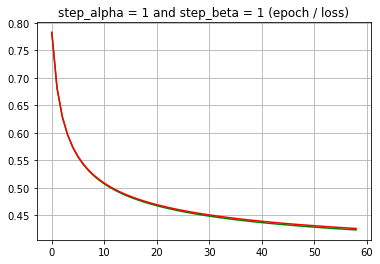



Method completed with num of iterations:  5
Accuracy train 0.45540928149392207
Accuracy val:  0.45385026854268384
Final loss train 0.8132957978464009
Final loss val 0.8123126760980325
Method running time:  0.9876258373260498


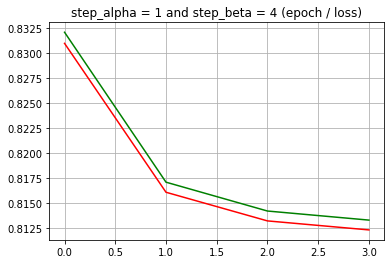



Method completed with num of iterations:  3
Accuracy train 0.46954615100642866
Accuracy val:  0.4697717312189456
Final loss train 0.7493783955307035
Final loss val 0.7485817674208449
Method running time:  0.49294328689575195


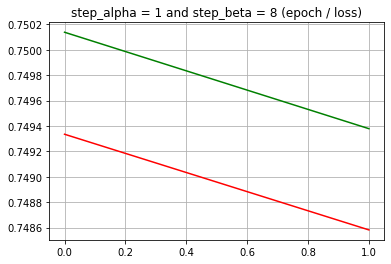



Method completed with num of iterations:  3
Accuracy train 0.46628677676290303
Accuracy val:  0.46598200553262803
Final loss train 0.7596060671957019
Final loss val 0.7590855313363706
Method running time:  0.4438505172729492


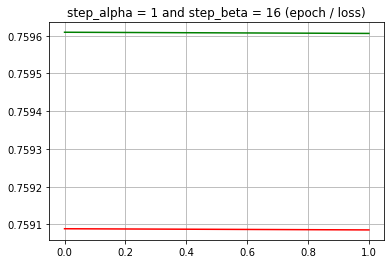



Method completed with num of iterations:  27
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3334697247890654
Final loss val 0.33962119542257624
Method running time:  5.53108024597168


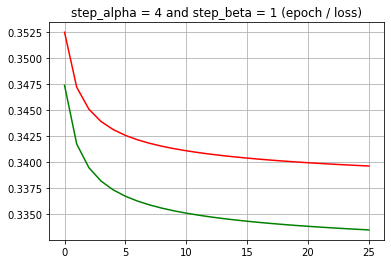



Method completed with num of iterations:  4
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3491094581448106
Final loss val 0.3548476780611518
Method running time:  0.6726655960083008


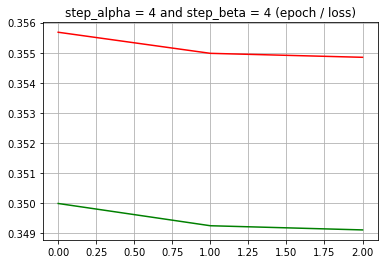



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.34533365009701916
Final loss val 0.35042972718844734
Method running time:  0.46291685104370117


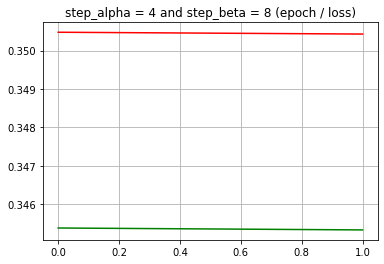



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.36867700464702197
Final loss val 0.374155986724994
Method running time:  0.47879767417907715


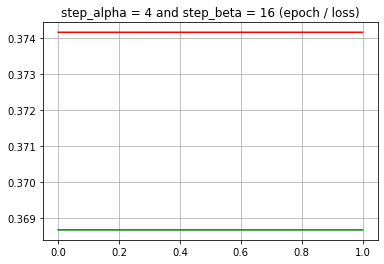



Method completed with num of iterations:  65
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3294480936413488
Final loss val 0.33673767963855705
Method running time:  12.34126091003418


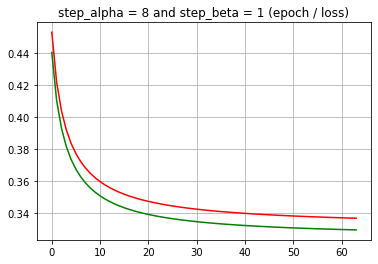



Method completed with num of iterations:  5
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.4166480118151744
Final loss val 0.42833921420908466
Method running time:  0.8783595561981201


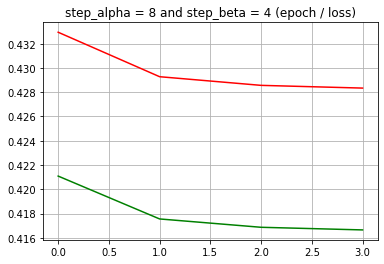



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.46736147787155263
Final loss val 0.48084820321292626
Method running time:  0.47555041313171387


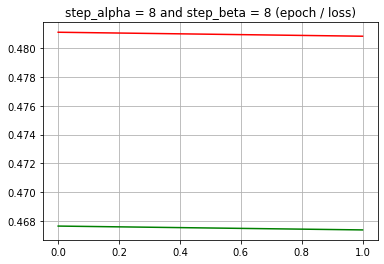



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.45649889863910503
Final loss val 0.4695106788390007
Method running time:  0.4391202926635742


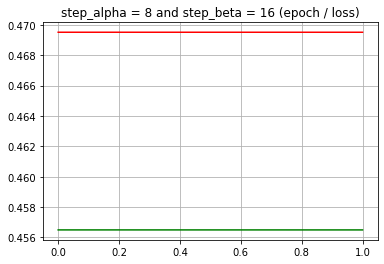



Method completed with num of iterations:  166
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.32550720226532787
Final loss val 0.3327053204036146
Method running time:  32.7441463470459


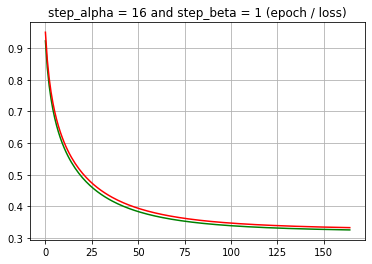



Method completed with num of iterations:  6
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.9548848017950493
Final loss val 0.9832246139778693
Method running time:  1.1225459575653076


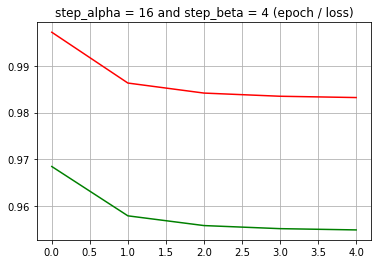



Method completed with num of iterations:  4
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.9681992489309477
Final loss val 0.9967443773275182
Method running time:  0.6555349826812744


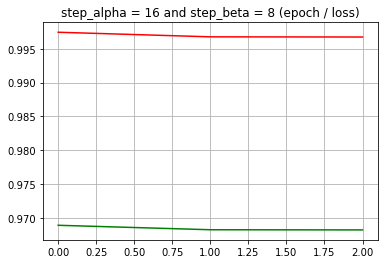



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 1.0308967540877594
Final loss val 1.0615145035322628
Method running time:  0.46780967712402344


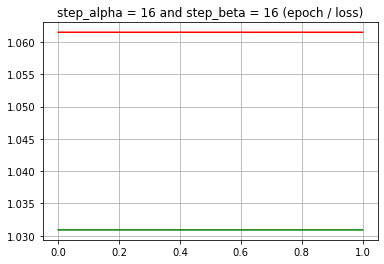

In [89]:
for i in [1,4,8,16]:
    for j in [1,4,8,16]:
        
        model = LinearModel(loss_function = BinaryLogisticLoss(l2_coef=0), step_alpha = i, step_beta=j, max_iter = 500)
        
        start_time = time.time()

        info = model.fit(x_train_csr, np.asarray(y_train), trace = True, X_val = x_val_csr,
                 y_val = np.asarray(y_val))
        
        y_pred = model.predict(x_val_csr)
        y_pred_train = model.predict(x_train_csr)
        
        print('Accuracy train', compute_balanced_accuracy(y_pred_train, np.asarray(y_train)))
        print('Accuracy val: ', compute_balanced_accuracy(y_pred, np.asarray(y_val)))
        print('Final loss train', model.get_objective(x_train_csr, np.asarray(y_train)))
        print('Final loss val', model.get_objective(x_val_csr, np.asarray(y_val)))
        print('Method running time: ',  time.time() - start_time)

        plt.grid()
        plt.title('step_alpha = {0} and step_beta = {1}'.format(i, j) + ' (epoch / loss)')
        plt.plot(range(0, len(info['func'])), info['func'], c='green')
        plt.plot(range(0, len(info['func_val'])), info['func_val'], c='red')
        plt.show()
        print('\n')

#### Приведите график / таблицу с результатами ваших экспериментов

UPD - заметил косяк, что число пройденных эпох выводится на 1 больше, чем есть на самом деле (так как в цикле проверка условия останова происходит в начале, и после неё выводится i, а надо i-1). Не стал это фиксить, чтобы не переделывать все таблицы с экспериментами 

![title](gd_results.png) 

#### Ответьте на следующие вопросы

1. По результатам экспериментов, какие параметры `step_alpha` и `step_beta` вы считаете наиболее оптимальными? Если пар оптимальных параметров получилось несколько, какую пару вы выберете для дальнейших экпериментов и почему?

    Исходя из построенных зависимостей, в качесте наиболее оптимальных можно выделить пары (4, 4), (4, 8), (4, 16), (8, 4), (8, 8), (8,16), так как они одновременно дают: 
    
    - максимальное значение по метрике качества на train и val;
    
    - время работы метода обучения, не превосходящее 1s;
    
    - знчение loss, не превосходящее 0.5 на train и val.

Из перечисленных комбинаций пара (4, 8) даёт наименьший итоговый loss 0.35 на обеих выборках. При этом время работы метода обучения составило 0.46s, что уступает лишь одной паре (8, 16) - 0.44s, при которой loss на порядок выше. Поэтому, в дальнейших экспериментах мы будем использовать пару (4, 8)


2. Какие зависимости между параметрами `step_alpha`/`step_beta` и временем работы алгоритма/кол-ва эпох вы наблюдаете? Опишите свои наблюдения.

    С увеличением step_beta время работа алгоритма и кол-во эпох уменьшаются (см. таблицу);
    
    Однозначной зависимости между step_alpha и временем работы/кол-вом эпох визуально не выделить
    
    
3. Поясните, в чём преимущество использования balanced accuracy для этой задачи по сравнению с обычной accuracy?

    Проанализировав значения целевого столбца, можно заметить, что токсичные комментарии составляют очень небольшую долю от общего числа, следовательно accuracy не будет отражать истииного качества класификатора. Например, если мы построим классификатор, который будет любой комментарий считать нетоксичным, а доля приходящих нетоксичных комментариев около 0.9, то значение accuracy тоже будет порядка 0.9, хотя классификатор бесполезен

### 2. Исследование параметров стахастического градиентного спуска (3 балла)
Исследуйте поведение стохастического градиентного спуска для задачи логистической регрессии в зависимости от следующих параметров:

- параметр темпа обучения `step_alpha`
- параметр темпа обучения `step_beta`
- размер подвыборки `batch_size`

**Замечание.** Обратите внимание, что в стохастическом случае необходимо строить зависимости метрик качества от эпохи метода. За одну эпоху через оптимизацию модели проходит $N$ объектов, где $N$ — длина обучающей выборки. Если вы реализуете семплирование согласно спецификации задания, то за одну эпоху каждый объект пройдёт через оптимизацию ровно один раз. В полном градиентном спуске одна эпоха метода соответствует одной итерации обучения.

Method completed with num of iterations:  39
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3188940320353714
Final loss val 0.3252609992248505
Method running time:  23.599488496780396


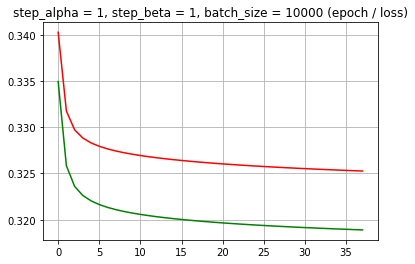



Method completed with num of iterations:  45
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.339522306187793
Final loss val 0.3450460890707168
Method running time:  10.090296745300293


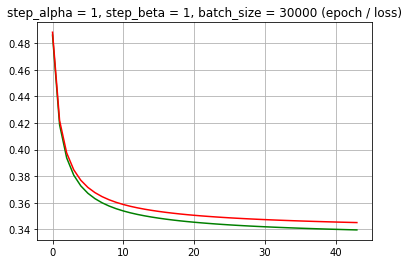



Method completed with num of iterations:  66
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.44065198937087113
Final loss val 0.4435507990336717
Method running time:  10.877598285675049


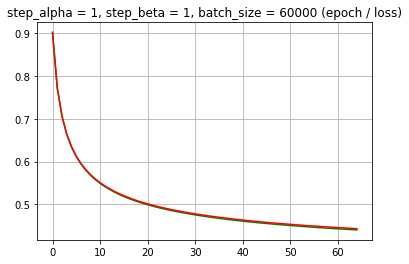



Method completed with num of iterations:  5
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.340185798935088
Final loss val 0.34573163866778145
Method running time:  2.2045388221740723


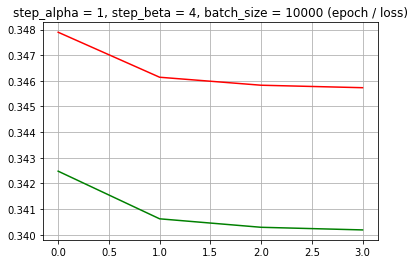



Method completed with num of iterations:  6
Accuracy train 0.47472122943239475
Accuracy val:  0.471803046620257
Final loss train 0.5320663986338169
Final loss val 0.5342431215842502
Method running time:  1.225933313369751


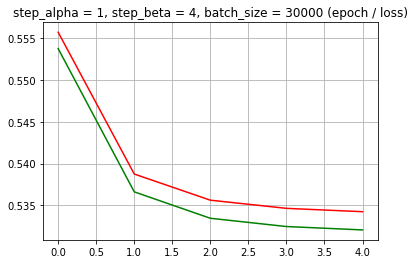



Method completed with num of iterations:  5
Accuracy train 0.4672812209042058
Accuracy val:  0.46712126154770484
Final loss train 0.6879469922864568
Final loss val 0.6880827219511294
Method running time:  0.7186586856842041


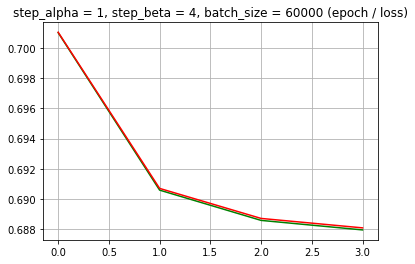



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3441269640767126
Final loss val 0.3494585634400306
Method running time:  1.13102126121521


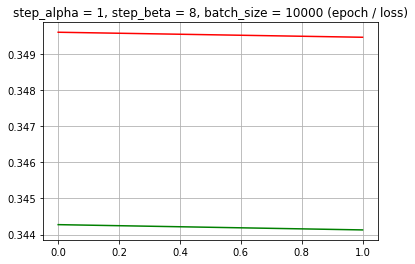



Method completed with num of iterations:  4
Accuracy train 0.4741385388759997
Accuracy val:  0.4750140435871825
Final loss train 0.5735842601824386
Final loss val 0.5748504106339665
Method running time:  0.7759315967559814


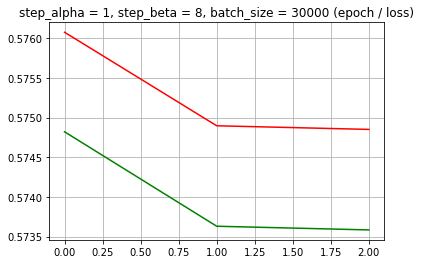



Method completed with num of iterations:  3
Accuracy train 0.47899173605897516
Accuracy val:  0.4782379469135259
Final loss train 0.7352048030644299
Final loss val 0.7353823747592594
Method running time:  0.356508731842041


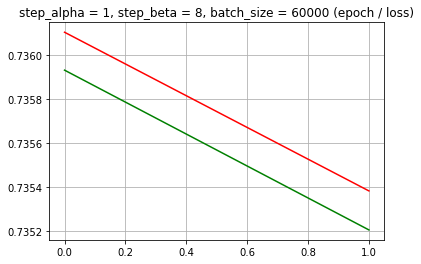



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3432892659520128
Final loss val 0.348587316948277
Method running time:  1.0821080207824707


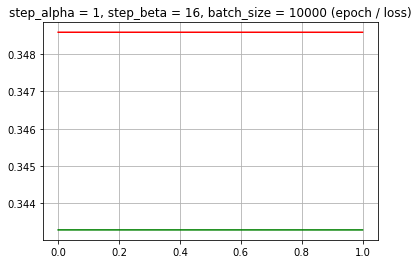



Method completed with num of iterations:  3
Accuracy train 0.4670347307814591
Accuracy val:  0.46770993179389225
Final loss train 0.5576011872209298
Final loss val 0.5583794021335524
Method running time:  0.5011518001556396


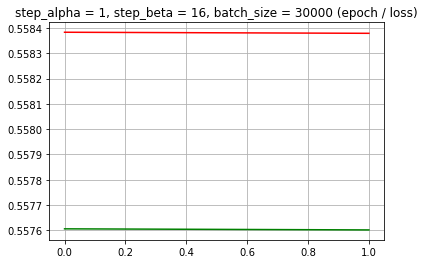



Method completed with num of iterations:  3
Accuracy train 0.10077082158300432
Accuracy val:  0.10379762700534759
Final loss train 0.9761430010423555
Final loss val 0.974166389727822
Method running time:  0.353041410446167


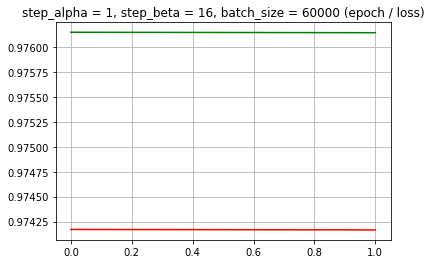



Method completed with num of iterations:  83
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3104559037557595
Final loss val 0.3161481653569319
Method running time:  42.50403904914856


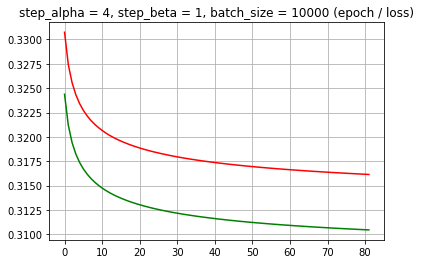



Method completed with num of iterations:  47
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3229470315595738
Final loss val 0.3293183170372303
Method running time:  10.592188596725464


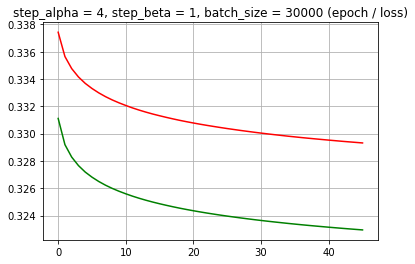



Method completed with num of iterations:  26
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.33103770550598116
Final loss val 0.3373020905542697
Method running time:  3.806816577911377


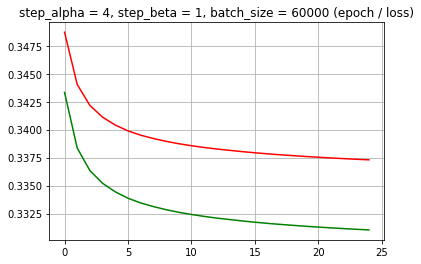



Method completed with num of iterations:  5
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.324298369449583
Final loss val 0.33085704621905715
Method running time:  2.1651227474212646


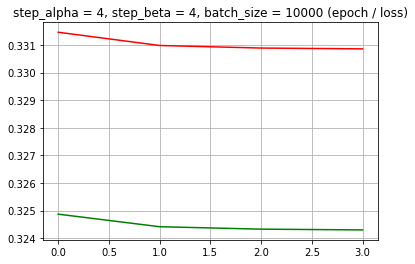



Method completed with num of iterations:  5
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3350161834573192
Final loss val 0.3413408756098836
Method running time:  0.9534621238708496


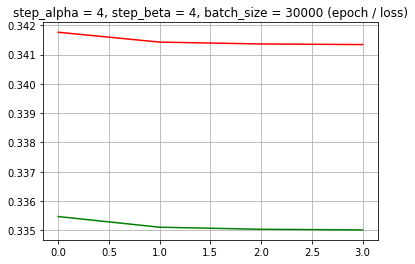



Method completed with num of iterations:  5
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3547428877614814
Final loss val 0.35965172513719024
Method running time:  0.6420538425445557


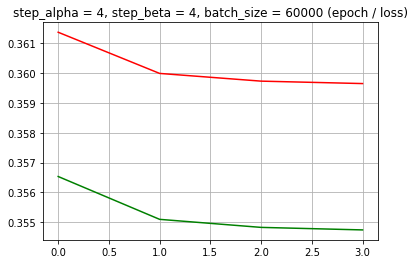



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.33131865352115447
Final loss val 0.3380582482178788
Method running time:  1.0362277030944824


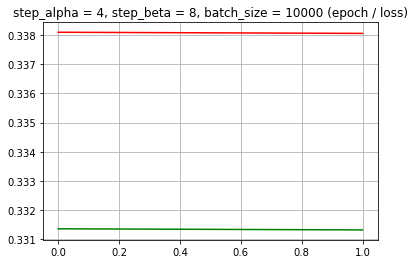



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.33728142840680136
Final loss val 0.3433499308913748
Method running time:  0.49268078804016113


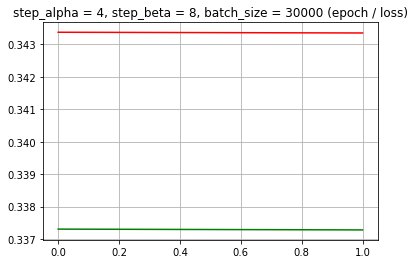



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3420427749844027
Final loss val 0.34707634320843034
Method running time:  0.35857367515563965


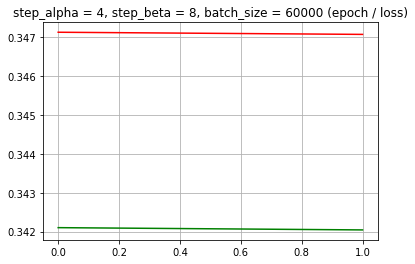



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3273808720163067
Final loss val 0.33424229565128094
Method running time:  1.0655057430267334


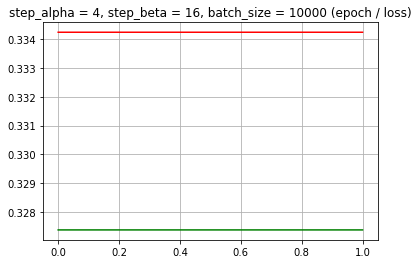



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.33369473767783997
Final loss val 0.3399142926388584
Method running time:  0.4856998920440674


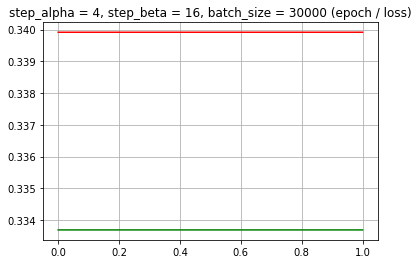



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.33975476114970354
Final loss val 0.34536857531681653
Method running time:  0.34906625747680664


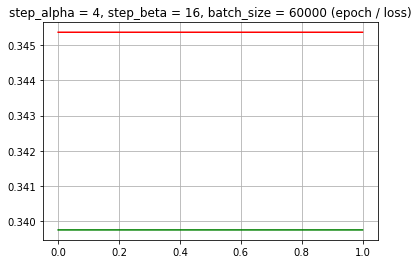



Method completed with num of iterations:  90
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3071832026511725
Final loss val 0.31271523967650344
Method running time:  46.50496768951416


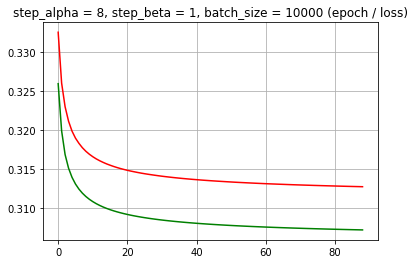



Method completed with num of iterations:  83
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3197963961999985
Final loss val 0.32606415824932933
Method running time:  18.870486974716187


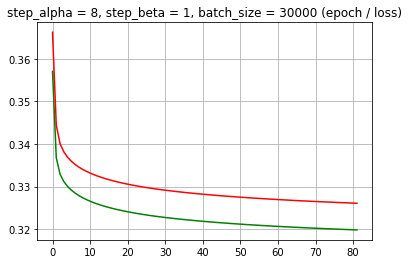



Method completed with num of iterations:  82
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.33589749177549205
Final loss val 0.3437201097915507
Method running time:  12.245259046554565


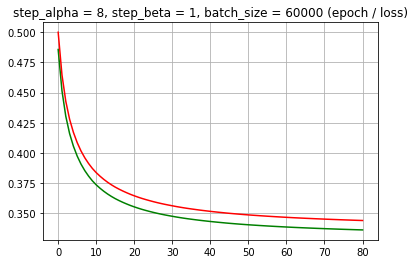



Method completed with num of iterations:  6
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3236381339910475
Final loss val 0.3299141280255309
Method running time:  2.5491528511047363


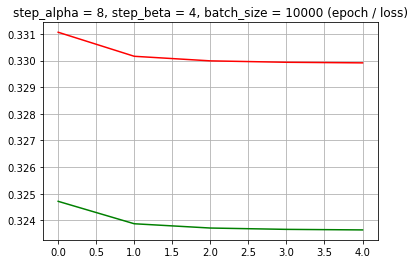



Method completed with num of iterations:  6
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3470765280767939
Final loss val 0.35562751664384423
Method running time:  1.1633999347686768


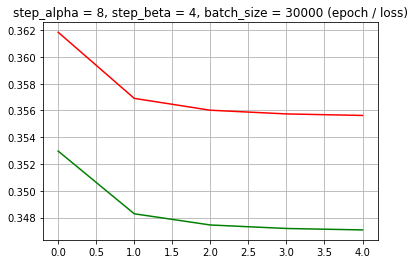



Method completed with num of iterations:  5
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.44577503016517
Final loss val 0.4584096784389358
Method running time:  0.6592824459075928


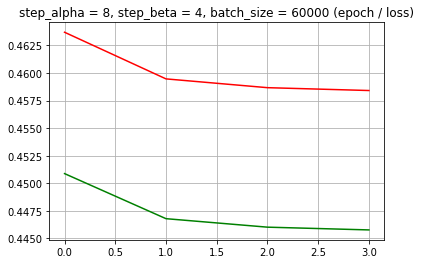



Method completed with num of iterations:  4
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3184895522424158
Final loss val 0.32452843708608914
Method running time:  1.6470725536346436


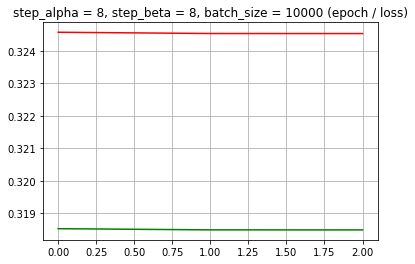



Method completed with num of iterations:  4
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.36208252249577794
Final loss val 0.37175817397964545
Method running time:  0.7350075244903564


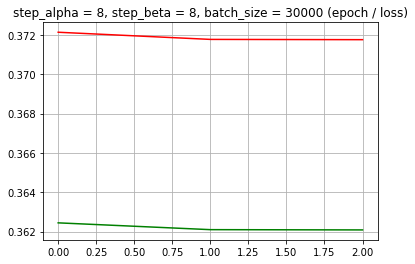



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.4595143845428052
Final loss val 0.4727707769431532
Method running time:  0.3331112861633301


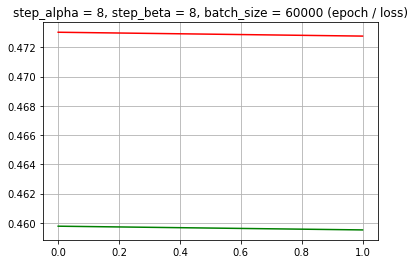



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.31911692354047866
Final loss val 0.3252761189723286
Method running time:  1.0292201042175293


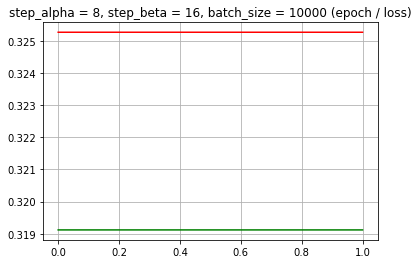



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.34790187555127083
Final loss val 0.356521476918167
Method running time:  0.49370813369750977


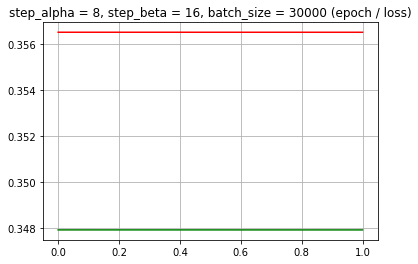



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.4710924522725839
Final loss val 0.48470869244771353
Method running time:  0.3420839309692383


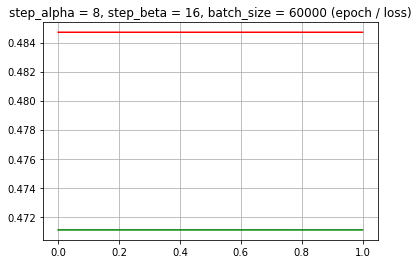



Method completed with num of iterations:  55
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.30573432068478607
Final loss val 0.31117636276590344
Method running time:  29.0039279460907


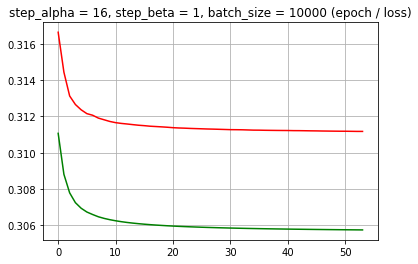



Method completed with num of iterations:  92
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.31095887335282685
Final loss val 0.3165789178755877
Method running time:  23.62709951400757


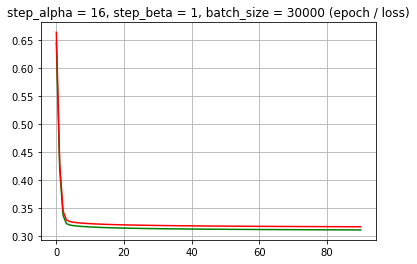



Method completed with num of iterations:  152
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.32566506286266617
Final loss val 0.33293562982947666
Method running time:  27.94226622581482


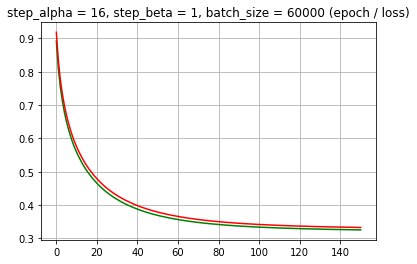



Method completed with num of iterations:  6
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3111505111374806
Final loss val 0.31672239504003186
Method running time:  3.753957748413086


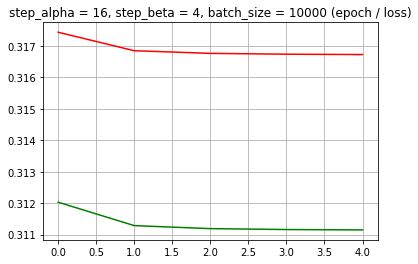



Method completed with num of iterations:  8
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.5113009741672044
Final loss val 0.5259722438033099
Method running time:  1.9307866096496582


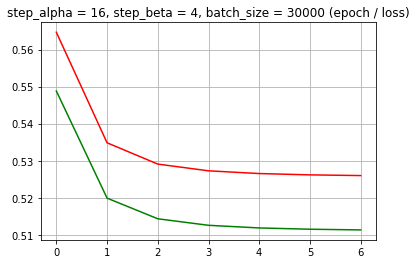



Method completed with num of iterations:  6
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.941846061193316
Final loss val 0.969897316162818
Method running time:  0.9205374717712402


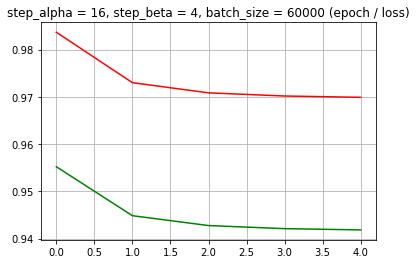



Method completed with num of iterations:  4
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3137313679598405
Final loss val 0.31932365893033743
Method running time:  1.7624521255493164


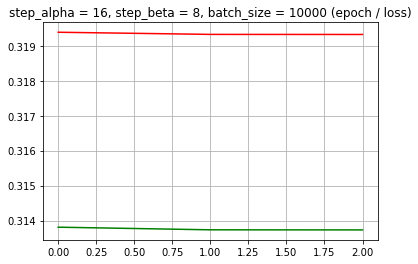



Method completed with num of iterations:  4
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.7016313502159072
Final loss val 0.7223038806339602
Method running time:  0.9060823917388916


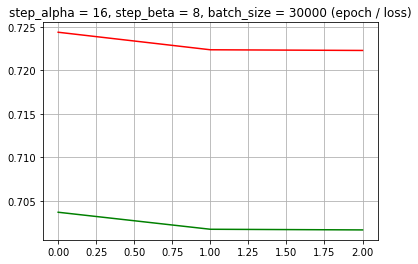



Method completed with num of iterations:  4
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.8907231842557777
Final loss val 0.9171301735284206
Method running time:  0.5017092227935791


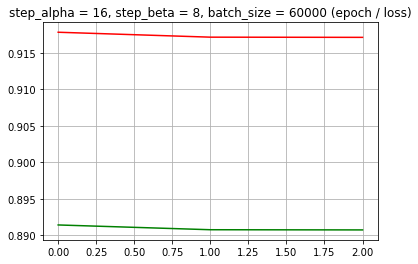



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.3132395608450623
Final loss val 0.318849340938074
Method running time:  1.373326063156128


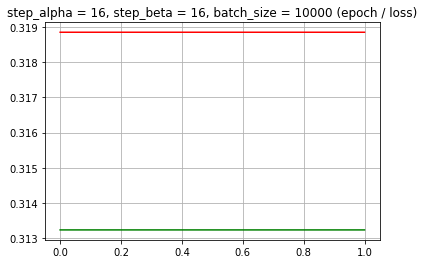



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.7254250907002737
Final loss val 0.7467467481762968
Method running time:  0.5834391117095947


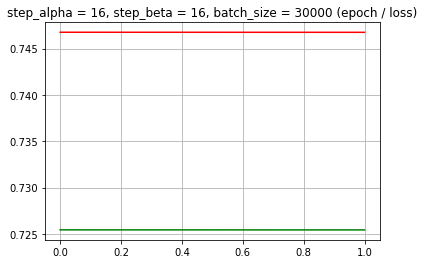



Method completed with num of iterations:  3
Accuracy train 0.8992291784169957
Accuracy val:  0.8962023729946524
Final loss train 0.953506414342822
Final loss val 0.9817088600806969
Method running time:  0.4577755928039551


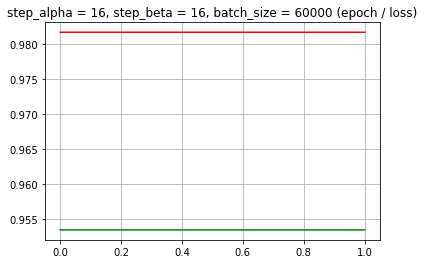

In [104]:
for i in [1,4,8,16]:
    for j in [1,4,8,16]:
        for k in [10000, 30000, 60000,]:
        
            model = LinearModel(loss_function = BinaryLogisticLoss(l2_coef=0), step_alpha = i, step_beta=j, max_iter = 500,
                                batch_size = k)
        
            start_time = time.time()

            info = model.fit(x_train_csr, np.asarray(y_train), trace = True, X_val = x_val_csr,
                     y_val = np.asarray(y_val))
        
            y_pred = model.predict(x_val_csr)
            y_pred_train = model.predict(x_train_csr)
        
            print('Accuracy train', compute_balanced_accuracy(y_pred_train, np.asarray(y_train)))
            print('Accuracy val: ', compute_balanced_accuracy(y_pred, np.asarray(y_val)))
            print('Final loss train', model.get_objective(x_train_csr, np.asarray(y_train)))
            print('Final loss val', model.get_objective(x_val_csr, np.asarray(y_val)))
            print('Method running time: ',  time.time() - start_time)

            plt.grid()
            plt.title('step_alpha = {0}, step_beta = {1}, batch_size = {2}'.format(i, j, k) + ' (epoch / loss)')
            plt.plot(range(0, len(info['func'])), info['func'], c='green')
            plt.plot(range(0, len(info['func_val'])), info['func_val'], c='red')
            plt.show()
            print('\n')

#### Приведите график / таблицу с результатами ваших экспериментов

![title](sgd_results.png)

#### Ответьте на следующие вопросы

1. По результатам экспериментов, какие параметры `step_alpha`, `step_beta` и `batch_size` вы считаете наиболее оптимальными? Если троек оптимальных параметров получилось несколько, какую пару вы выберете для дальнейших экпериментов и почему?

    Исходя из построенных зависимостей, в качесте наиболее оптимальных можно выделить пары (4,4), (4,8), (4,16), (8,8), (8,16) с (batch size = 30000 или batch size - 6000), а также пару (8,4) с batch_size =  6000, так как они одновременно дают: 
    
    - максимальное значение по метрике качества на train и val;
    
    - время работы метода обучения, не превосходящее 1s;
    
    - знчение loss, не превосходящее 0.5 на train и val.
    
    Заметим, что из перечисленных комбинаций тройка (4,16,60000) даёт наименьший итоговый loss на обеих выборках - 0.33 на обучающей и 0.34 на тестовой. При этом время работы метода обучения составило 0.34s, что уступает лишь одной тройке (8, 8, 60000) - 0.33s, при которой loss на порядок выше. Поэтому, в дальнейших экспериментах мы будем использовать тройку (4, 16, 60000 )
    

2. Какие зависимости между параметрами `step_alpha`/`step_beta`/`batch_size` и временем работы алгоритма/кол-ва эпох вы наблюдаете? Опишите свои наблюдения.

      С увеличением step_beta время работа алгоритма и кол-во эпох уменьшаются (см. таблицу);
    
    Однозначной зависимости между step_alpha и временем работы/кол-вом эпох визуально не выделить
    
    

### 3. Сравнение двух методов (2 балла)
Сравните поведение двух методов между собой, и ответьте на следующие вопросы

1. Какой алгоритм вы выберете для дальнейших экспериментов и почему?

    Сравнивая результаты работы методов при наилучших комбинациях гиперпараметров, заметим, что SGD отработал быстрее (0.34 против 0.46 с.), а итоговый loss получился меньше (0.33 против 0.35 на обучающей выборке и 0.34 против 0.35 на валидационной)
    

2. Есть ли разница между парами оптимальных параметров `step_alpha` и `step_beta` в двух алгоритмах? Объясните разницу/отсутствие разницы в результатах.

    step_alpha совпал, а step_beta нет, но по таблицам видно, что показатели практически идентичны. Так, если взять step_beta=16 для GD, loss на обеих выборках будет отличаться на две сотых, а время работы алгоритма - на две секунды по сравнению с выбранной парой. Если же взять step_beta=8 для SGD, то loss будет отличаться только на обучающей выборке на одну сотую, и время работы алгоритма на одну секунду. Различия могут быть связаны с рандомным выбором начальных весов вместо какой-то фиксированной конфигурации, например, нулевой.

### 4. Регуляризация (2 балла)
Подберите по отложенной выборке коэффициент $l2$-регуляризации модели. 

Приведите график с результатами ваших экспериментов. Обоснуйте свой выбор.

Method completed with num of iterations:  3
Accuracy val:  0.8962023729946524
Final loss train 0.3488700094229192
Final loss val 0.35376988125226494
Method running time:  0.38954997062683105


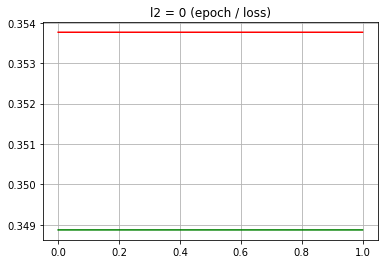



Method completed with num of iterations:  3
Accuracy val:  0.8962023729946524
Final loss train 0.36340913506284983
Final loss val 0.3692224116905666
Method running time:  0.36506056785583496


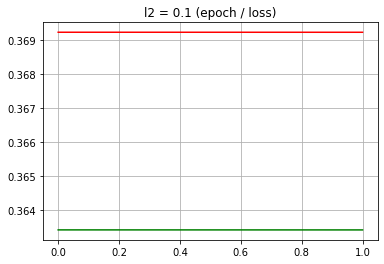



Method completed with num of iterations:  3
Accuracy val:  0.8962023729946524
Final loss train 3.0683977691044295
Final loss val 3.0758219606719317
Method running time:  0.38697338104248047


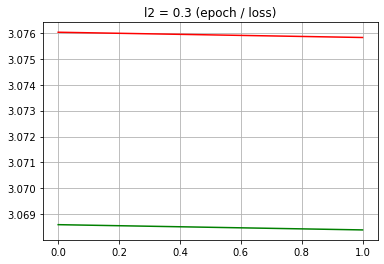



Method completed with num of iterations:  3
Accuracy val:  0.8962023729946524
Final loss train 19.476061252279234
Final loss val 19.485680077303833
Method running time:  0.3580458164215088


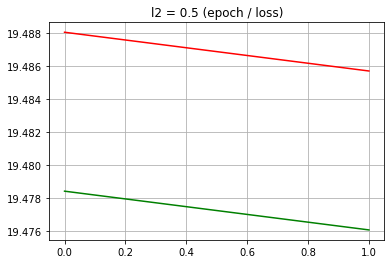



Method completed with num of iterations:  3
Accuracy val:  0.8962023729946524
Final loss train 225.4510488924463
Final loss val 225.464008853992
Method running time:  0.36207032203674316


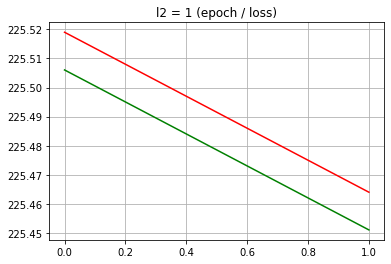

In [16]:
for i in [0, 0.1, 0.3, 0.5, 1]:
        
        model = LinearModel(loss_function = BinaryLogisticLoss(l2_coef=i), step_alpha = 4, step_beta = 16, max_iter = 500, 
                            batch_size = 60000)
        
        start_time = time.time()

        info = model.fit(x_train_csr, np.asarray(y_train), trace = True, X_val = x_val_csr,
                  y_val = np.asarray(y_val))
        
        y_pred = model.predict(x_val_csr)
        
        print('Accuracy val: ', compute_balanced_accuracy(y_pred, np.asarray(y_val)))
        print('Final loss train', model.get_objective(x_train_csr, np.asarray(y_train)))
        print('Final loss val', model.get_objective(x_val_csr, np.asarray(y_val)))
        print('Method running time: ',  time.time() - start_time)

        plt.grid()
        plt.title('l2 = {0}'.format(i) + ' (epoch / loss)')
        plt.plot(range(0, len(info['func'])), info['func'], c='green')
        plt.plot(range(0, len(info['func_val'])), info['func_val'], c='red')
        plt.show()
        print('\n')

![title](reg_loss.png)

Выберем l2=0, так как при нём достигается наименьшее значение функции потерь 

### 5. Измерение качества и интерпретация результатов (3 балла)
Выберите лучший алгоритм для тестовой выборки. Обратите внимание, что необходимо использовать порог бинаризации, выбранный на отложенной выборке.

In [33]:
model = LinearModel(loss_function = BinaryLogisticLoss(l2_coef=0), step_alpha = 4, step_beta = 16, max_iter = 500, 
                            batch_size = 60000)

start_time = time.time()
info = model.fit(x_train_csr, np.asarray(y_train), trace = True, X_val = x_val_csr,
                  y_val = np.asarray(y_val))

model.get_optimal_threshold(x_val_csr, np.asarray(y_val))

y_pred = model.predict(x_val_csr)
y_pred_test =  model.predict(x_test_csr)

print('Accuracy val: ', compute_balanced_accuracy(y_pred, np.asarray(y_val)))
print('Accuracy test: ', compute_balanced_accuracy(y_pred_test, np.asarray(Y_test)))

Method completed with num of iterations:  3
Accuracy val:  0.8962023729946524
Accuracy test:  0.90241958173122


#### Ответьте на следующие вопросы

1. Примените лучший алгоритм к тестовой выборке и посмотрите на метрику качества. Сравните ее с метрикой на валидации. Опишите ваши наблюдения.

Итак, метрика качества на валидационной выборке составила 0.896, а на тестовой - 0.902, то есть чуть больше.

Визуализируем ошибочные объекты

In [63]:
differences = []
for i in range(len(y_pred_test)):
    if y_pred_test[i]!=Y_test[i]:
        differences.append(i)

In [57]:
data_test['i'] = range(0, data_test.shape[0])

for x in differences:
    print(data_test['comment_text'][x])

['arab', 'committing', 'genocide', 'iraq', 'protest', 'europe.', 'may', 'europe', 'also', 'burn', 'hell.']
['dj', 'robinson', 'gay', 'hell', 'suck', 'dick', 'much']
['fuck', 'anti', 'semitic', 'cunt.']
['dare', 'vandalize', 'page', 'hm', 'beagle', 'vandalize', 'demon']
['arrogant', 'self', 'serving', 'immature', 'idiot.', 'get', 'right.']
['eek', 'shes', 'cute', 'earthy', 'kind', 'way.', 'cant', 'sing', 'shit', 'though.', 'thanks', 'giving', 'unhappy', 'memory.']
['well', 'suck', 'university', 'nicknameless.', 'first', 'time', 'ncaa', 'history', 'happened.']
['argh', 'random', 'idiot', 'deleted', 'whole', 'japan', 'article', '.']
['hate', 'america', 'going', 'bomb', 'shit', 'city', 'queza', 'rain']
['bold', 'textyou', 'suck', 'u', 'suck', 'hannah', 'montana']
['moi', 'ego', 'mortified', 'could', 'say', 'thing', 'poor', 'old', 'mona', 'always', 'thiught', 'miserable', 'looking', 'woman', 'probably', 'hormonal.']
['tenth', 'anniversary', '9', '11', 'new', 'york', 'time', 'columnist', 'pa

2. Проанализируйте ошибки алгоритма. Проанализируйте и укажите общие черты объектов, на которых были допущены ошибки. Наблюдения опишите.

    Можно заметить, что все или большинство ошибочных объектов интуитивно отностся к множеству токсичных комментариев, так как содержат много слов, таких как "hell", "stupid" и т.д.